In [54]:
import pandas as pd
import matplotlib as plt
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df=pd.read_csv('../data/TwitchDataSet.csv')



In [56]:
df.head()

,profile picture,top count,screen name,watch time,stream time,peak viewers,average viewers,followers,followers gained,views gained,partnered,mature,language,completa name,first category,second category,third category
0,https://static-cdn.jtvnw.net/jtv_user_pictures...,1,xQcOW,7333609065,215670,222720,32913,3691010,2051895,109735389,True,False,English,xQcOW,Just Chatting,Among Us,Overwatch
1,https://static-cdn.jtvnw.net/jtv_user_pictures...,2,Gaules,6314532585,515595,387315,12254,1966465,1141123,112807468,True,True,Portuguese,Gaules,Counter-Strike: Global Offensive,Among Us,PLAYERUNKNOWN
2,https://static-cdn.jtvnw.net/jtv_user_pictures...,3,summit1g,6235007490,216000,310998,25931,5374710,1402547,91501875,True,False,English,summit1g,Escape From Tarkov,Sea of Thieves,Grand Theft Auto V
3,https://static-cdn.jtvnw.net/jtv_user_pictures...,4,ESL_CSGO,4764929775,517965,300575,9249,4195657,870484,126008641,True,False,English,ESL_CSGO,Counter-Strike: Global Offensive,NaN,NaN
4,https://static-cdn.jtvnw.net/jtv_user_pictures...,5,NICKMERCS,3853252845,131880,163241,29183,4415637,1337535,49164651,True,False,English,NICKMERCS,Call Of Duty: Modern Warfare,Fortnite,Halo: The Master Chief Collection


In [57]:
print(df.columns.tolist())


['profile picture', 'top count', 'screen name', 'watch time', 'stream time', 'peak viewers', 'average viewers', 'followers', 'followers gained', 'views gained', 'partnered', 'mature', 'language', 'completa name', 'first category', 'second category', 'third category']


In [58]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.lower()  # Normalize to lowercase (if needed)

print(df.columns.tolist())  # Verify the columns again


['profile picture', 'top count', 'screen name', 'watch time', 'stream time', 'peak viewers', 'average viewers', 'followers', 'followers gained', 'views gained', 'partnered', 'mature', 'language', 'completa name', 'first category', 'second category', 'third category']


In [59]:
# Check if 'profile_picture' exists and drop it
if 'profile_picture' in df.columns:
    df = df.drop('profile_picture', axis=1)
    print("Column 'profile_picture' dropped")
else:
    print("Column 'profile_picture' not found")


Column 'profile_picture' not found


In [60]:
# Drop the column in place
df.drop('profile picture', axis=1, inplace=True)

# Print the DataFrame to verify
print(df)


      top count       screen name  watch time  stream time  peak viewers  \
0             1             xQcOW  7333609065       215670        222720   
1             2            Gaules  6314532585       515595        387315   
2             3          summit1g  6235007490       216000        310998   
3             4          ESL_CSGO  4764929775       517965        300575   
4             5         NICKMERCS  3853252845       131880        163241   
...         ...               ...         ...          ...           ...   
8795       8796  MARCUSakaAPOSTLE     8830110        72495          2671   
8796       8797     MIMISHKA_MEOW     8829870        96090          2039   
8797       8798           MySteam     8829075        44400          1158   
8798       8799        Iker_Guide     8828805       126990           433   
8799       8800          dhary_xd     8827995       165105          2270   

      average viewers  followers  followers gained  views gained  partnered  \
0       

In [61]:
print(df)


      top count       screen name  watch time  stream time  peak viewers  \
0             1             xQcOW  7333609065       215670        222720   
1             2            Gaules  6314532585       515595        387315   
2             3          summit1g  6235007490       216000        310998   
3             4          ESL_CSGO  4764929775       517965        300575   
4             5         NICKMERCS  3853252845       131880        163241   
...         ...               ...         ...          ...           ...   
8795       8796  MARCUSakaAPOSTLE     8830110        72495          2671   
8796       8797     MIMISHKA_MEOW     8829870        96090          2039   
8797       8798           MySteam     8829075        44400          1158   
8798       8799        Iker_Guide     8828805       126990           433   
8799       8800          dhary_xd     8827995       165105          2270   

      average viewers  followers  followers gained  views gained  partnered  \
0       

In [62]:

df['screen name'].count

<bound method Series.count of 0                  xQcOW
1                 Gaules
2               summit1g
3               ESL_CSGO
4              NICKMERCS
              ...       
8795    MARCUSakaAPOSTLE
8796       MIMISHKA_MEOW
8797             MySteam
8798          Iker_Guide
8799            dhary_xd
Name: screen name, Length: 8800, dtype: object>

In [63]:
top_followers = df.sort_values(by='followers', ascending=False).head(20)

# Sort by 'views_gained' to get the top 20 with the most views gained
top_views = df.sort_values(by='views gained', ascending=False).head(20)

# Display results
print("Top 10 by Followers:")
print(top_followers)

print("\nTop 10 by Views Gained:")
print(top_views)

Top 10 by Followers:
      top count             screen name  watch time  stream time  \
242         243                   Ninja   480278160        14985   
8             9                    Tfue  3276339360       130680   
99          100                  shroud   938602095        29385   
48           49                    Myth  1465594215       129465   
7             8                  Rubius  3278317200        63285   
78           79                pokimane  1132577385        57900   
10           11            TimTheTatman  3183232095       106455   
2             3                summit1g  6235007490       216000   
9            10               auronplay  3268219170        47385   
14           15  Riot Games (riotgames)  2730387960        78330   
109         110                 dakotaz   859130235       133755   
20           21                TheGrefg  2246713830        66375   
42           43            DrDisrespect  1575638895        59415   
4             5            

In [71]:
# Sort by watch time in descending order
top_streamers = df.sort_values(by='watch time', ascending=False).head(10)
# Extract screen name and followers
top_followers = top_streamers[['screen name', 'followers']]

# Display the results
print(top_followers)


  screen name  followers
0       xQcOW    3691010
1      Gaules    1966465
2    summit1g    5374710
3    ESL_CSGO    4195657
4   NICKMERCS    4415637
5  Fextralife     533400
6   loltyler1    3719080
7      Rubius    6579492
8        Tfue    9184421
9   auronplay    5053692


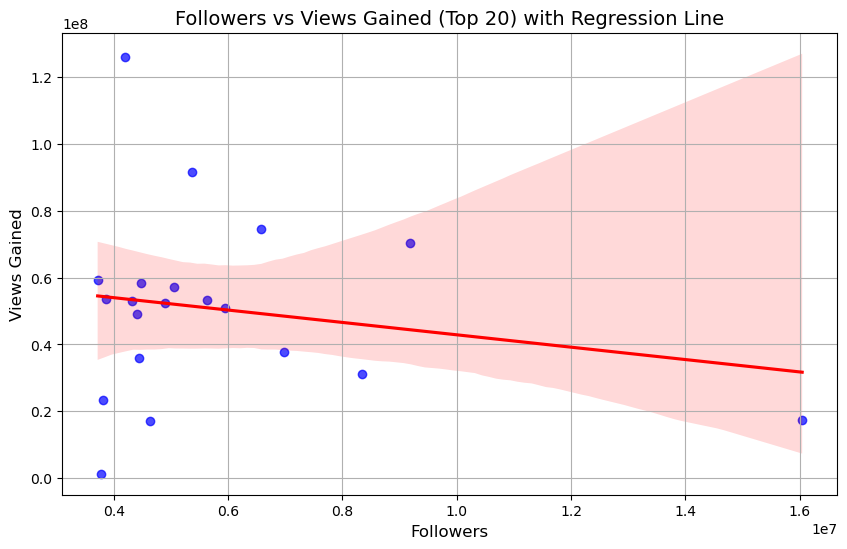

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=top_20['followers'], y=top_20['views gained'], scatter_kws={'color': 'blue', 'alpha': 0.7}, line_kws={'color': 'red'})
plt.title("Followers vs Views Gained (Top 20) with Regression Line", fontsize=14)
plt.xlabel("Followers", fontsize=12)
plt.ylabel("Views Gained", fontsize=12)
plt.grid(True)
plt.show()


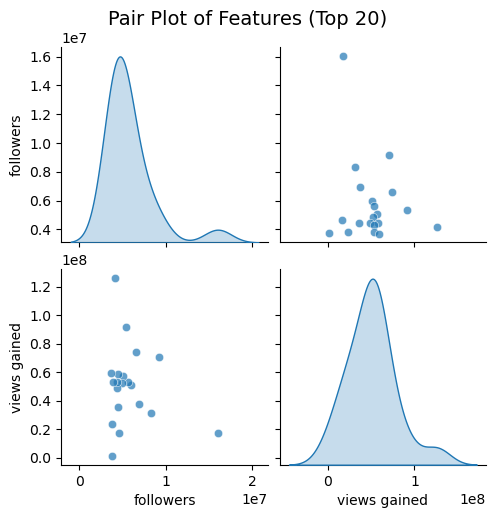

In [49]:
# Pair Plot
sns.pairplot(top_20[['followers', 'views gained']], kind="scatter", diag_kind="kde", plot_kws={'alpha': 0.7})
plt.suptitle("Pair Plot of Features (Top 20)", y=1.02, fontsize=14)
plt.show()
